# Team Project 2 - Interpolation
## Chris Hayduk

In this project, we investigate various aspects of polynomial interpolation and spline interpolation. 

There are several essential NumPy routines. 
<ul>
    <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.polynomials.classes.html">Polynomial</a> routine which enables to identify a vector $[a, b, c, \cdots]$ with a polynomial $a + bx + cx^2+ \cdots$ and to manipulate it;</li>
    <li><a href="https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.linalg.html">Linear algebra</a> routine which could be applied to do some basic linear algebra;</li>
    <li><a href="https://matplotlib.org/users/pyplot_tutorial.html">Pyplot</a> which is used to plot graphs.</li>
</ul>
You may find some information and examples by clicking the name of each routine.

In this project, let $f(x) = \frac{1}{1+x^2}$. We will compute several approximations of $f(x)$ on $[-5, 5]$, coming from various interpolations of sample points on the graph of $f(x)$. 

In [3]:
#Define the function f(x)
def f(x):
    fx = 1/(1+x**2)
    
    return fx

#### 1. (10 pts) Let $\{x_0, x_1, \cdots, x_n\}$ be the set of equally spaced numbers with $x_0 = -5$ and $x_n = 5$. For $n = 9$, find the polynomial interpolation $p_{9}(x)$ of $\{(x_0, f(x_0)), (x_1, f(x_1)), \cdots, (x_9, f(x_9))\}$ of degree $\le 9$ by <em>Lagrange interpolation</em> and sketch the graph of $f(x)$ and $p_{9}(x)$ on the same plane (for $-5 \le x \le 5$). 

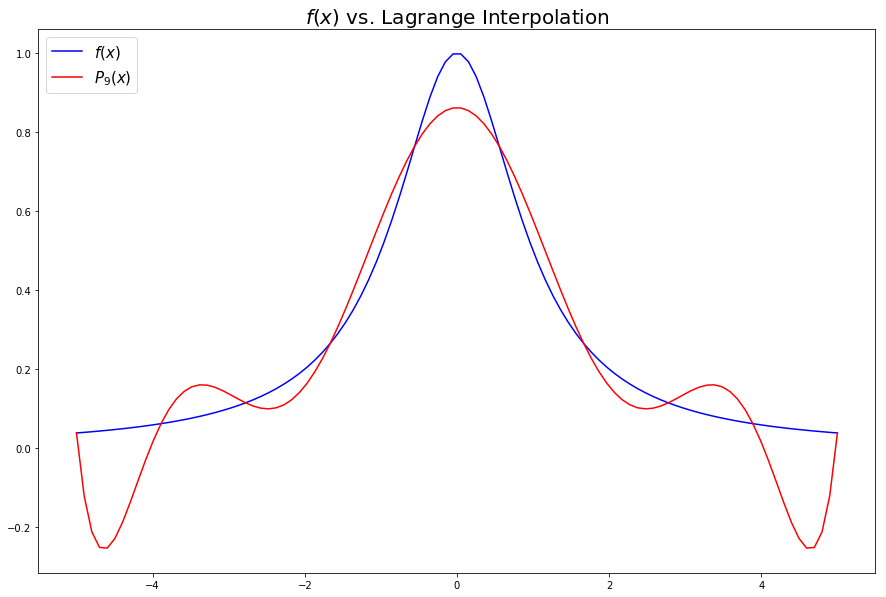

In [4]:
import numpy as np
import matplotlib.pyplot as plt

#Set the default plot size
plt.rcParams['figure.figsize'] = [15, 10]

#Function to create each Lagrange polynomial (L_i)
def lagrange_polynomial(x, i, x_vec):
    y = 1.0
    
    for j in range(len(x_vec)):
        if i != j:
            y *= (x-x_vec[j])/(x_vec[i] - x_vec[j])
    
    return y

#Function to interpolate the provided data points
def interpolate(x, x_vec, y_vec):
    polynomial = []
    
    for i in range(len(x_vec)):
        polynomial.append(lagrange_polynomial(x, i, x_vec))
            
    y = np.dot(y_vec, polynomial)
   
    return y

#Generate the x input for the Lagrange polynomial and the x values to graph
x_vec = np.linspace(-5, 5, 10)
x_plot = np.linspace(-5, 5, 100)

#Generate the y input for the Lagrange polynomial and the y values to graph for f(x)
y_vec = [f(x) for x in x_vec]
y_plot = [f(x) for x in x_plot]

#Generate the y the y values to graph for P_9(x)
lagrange_y_plot = [interpolate(x, x_vec, y_vec) for x in x_plot]

#Plot the two functions
plt.plot(x_plot, y_plot, 'b-', label = '$f(x)$')
plt.plot(x_plot, lagrange_y_plot, 'r-', label = '$P_9(x)$')
plt.legend(loc='upper left', fontsize = 15)
plt.title("$f(x)$ vs. Lagrange Interpolation", fontsize = 20)
plt.show()

#### 2. (10 pts) Let $\{y_0, y_1, \cdots, y_n\}$ be the set of zeros of Chebyshev polynomial $T_{n+1}(x)$. For $n = 9$, find the polynomial interpolation $p_9(x)$ of $\{(5y_0, f(5y_0)), (5y_1, f(5y_1)), \cdots, (5y_9, f(5y_9))\}$ of degree $\le 9$ by using <em>divided differences</em> and sketch the graph of $f(x)$ and $p_9(x)$ on the same plane (for $-5 \le x \le 5$).  

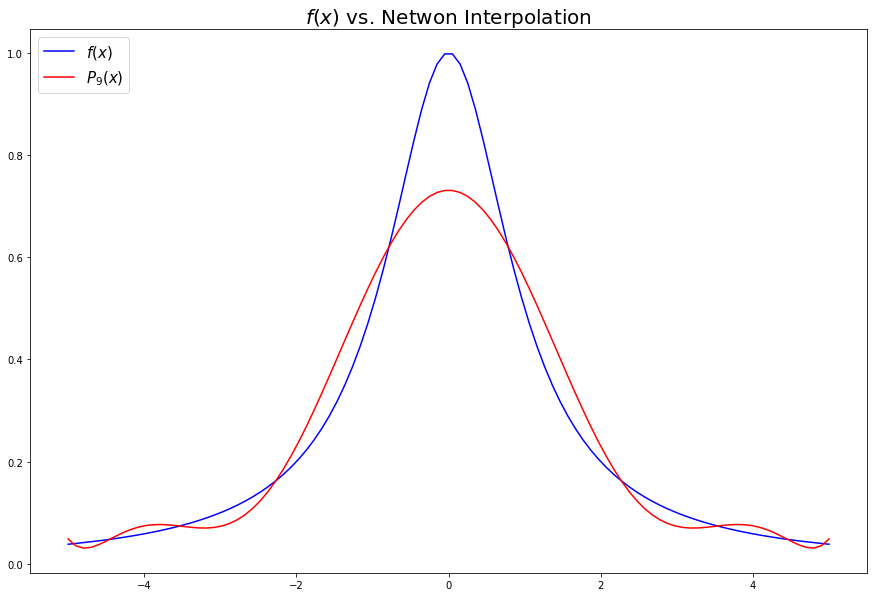

In [5]:
from math import sqrt
from numpy.polynomial import Chebyshev as T

#Define T_10 polynomial
poly = T.basis(10)

#Get roots of polynomial
roots = poly.roots()

#Function to calculate divided differences
#Takes in lists of nodes and function values as input
#Outputs divided differences
def divdif(t_nodes, f_values):
    divdif_f = f_values
    m = len(t_nodes)
    
    for i in range(1, m):        
        for j in range(m-1, i-1, -1):
            divdif_f[j] = (divdif_f[j]-divdif_f[j-1])/(t_nodes[j]-t_nodes[j-i])
    
    return divdif_f

#Function to compute the Newton interpolating polynomial
def newton_interpolation(x_nodes, divdif_y, x_eval):
    m = len(x_nodes)
    p_eval = divdif_y[m-1] * np.ones(len(x_eval))
    
    for i in range(m-1, -1, -1):
        p_eval = divdif_y[i] + (x_eval - x_nodes[i])*p_eval
    
    return p_eval

#Generate the x_nodes and y_nodes for input in divided differences function
x_nodes = [5*root for root in roots]
y_nodes = [f(x) for x in x_nodes]

#Generate x point and f(x) points to plot
x_eval = np.linspace(-5, 5, 100)
y_plot = [f(x) for x in x_eval]

#Calculate divided differences
divdif_y = divdif(x_nodes, y_nodes)

#Calculate Newton Interpolating polynomial values using x_nodes and divided differences from above
#Calculate values at each of the 100 equally spaced points in x contained in [-5, 5]
newton_interpol = newton_interpolation(x_nodes, divdif_y, x_eval)

#Plot the two functions
plt.plot(x_eval, y_plot, 'b-', label = '$f(x)$')
plt.plot(x_eval, newton_interpol, 'r-', label = '$P_9(x)$')
plt.legend(loc='upper left', fontsize = 15)
plt.title("$f(x)$ vs. Netwon Interpolation", fontsize = 20)
plt.show()

#### 3. (10 pts) Let $\{x_0, x_1, \cdots, x_n\}$ be the set of equally spaced numbers with $x_0 = -5$ and $x_n = 5$. For $n = 9$, find the natural cubic spline function $s(x)$ and sketch the graph of $f(x)$ and $s(x)$ on the same plane (for $-5 \le x \le 5$). 

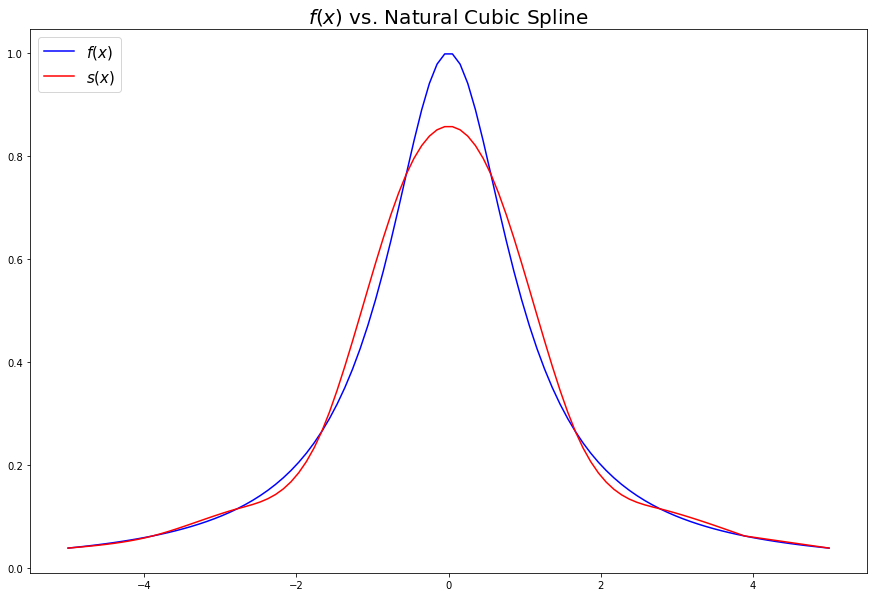

In [12]:
#Function to create cubic spline
def cubic_spline(x_vec, y_vec):
    k = len(x_vec)-1
    
    a = y_vec
    b = [0 for i in range(k)]
    d = [0 for i in range(k)]
    mu = [0 for i in range(k)]
    
    h = [x_vec[i+1] - x_vec[i] for i in range(0,k)]
    
    alpha = [0 for i in range(k-1)]
    
    for i in range(1,k-1):
        alpha[i] = (3/(h[i]))*(a[i+1]-a[i]) - (3/(h[i-1]))*(a[i]-a[i-1])
    
    c = [0 for i in range(k+1)]
    l = [0 for i in range(k+1)]
    z = [0 for i in range(k+1)]
    
    l[0] = 1.0
    
    for i in range(1, k-1):
        l[i] = 2*(x_vec[i+1] - x_vec[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alpha[i] - h[i-1]*z[i-1])/l[i]
    
    l[k] = 1
    
    z[k] = 0
    c[k] = 0
    
    for j in range(k-1, -1, -1):
        c[j] = z[j] - mu[j]*c[j+1]
        b[j] = (a[j+1] - a[j])/h[j] - (h[j]*(c[j+1]+2*c[j]))/3.0
        d[j] = (c[j+1] - c[j])/(3*h[j])
        
    polynomial = []
    for i in range(k):
        polynomial.append([a[i], b[i], c[i], d[i], x_vec[i]])
        
    return polynomial 

#Function to interpolate data points with the cubic spline
def interpolate_with_spline(x_plot, spline):
    row = 0
    spline_plot = []
    for i in range(len(x_plot)):
        if(row != len(spline)-1):
            if(x_plot[i] > spline[row+1][4]):
                       row += 1
        spline_plot.append(spline[row][0] + spline[row][1]*(x_plot[i]-spline[row][4]) 
                           + spline[row][2]*(x_plot[i]-spline[row][4])**2 
                           + spline[row][3]*(x_plot[i]-spline[row][4])**3)
    
    return spline_plot
    
x_vec = np.linspace(-5, 5, 10)
y_vec = [f(x) for x in x_vec]

spline = cubic_spline(x_vec, y_vec)

x_plot = np.linspace(-5, 5, 100)
y_plot = [f(x) for x in x_plot]

spline_plot = interpolate_with_spline(x_plot, spline)

#Plot the two functions
plt.plot(x_plot, y_plot, 'b-', label = '$f(x)$')
plt.plot(x_plot, spline_plot, 'r-', label = '$s(x)$')
plt.legend(loc='upper left', fontsize = 15)
plt.title("$f(x)$ vs. Natural Cubic Spline", fontsize = 20)
plt.show()

#### 4. (20 pts) 
In computer graphics, <em>vectorization</em> is the conversion of raster graphics into vector graphics. 

Roughly, raster graphics is a graphic format consists of collection of colored dots. Examples include JPG, GIF and PNG formats. Raster graphics are resolution dependent, meaning they cannot scale up to an arbitrary resolution without loss of apparent quality. (If you zoom in a jpg file, then you can see many colored squares.

On the other hand, vector graphics are defined in terms of points, which are connected by lines and curves to form polygons and other shapes. Typical examples are font files, SVG and PDF. Because they encodes relative mathematical data, it could be easily scaled up without any loss of quality. 

Vectorization, or image tracing is a method to convert a given raster graphic data into a vector graphic format. In this project, we will investigate one of the simplest kind of image tracing by using spline function. Consider the following image of a concept car:

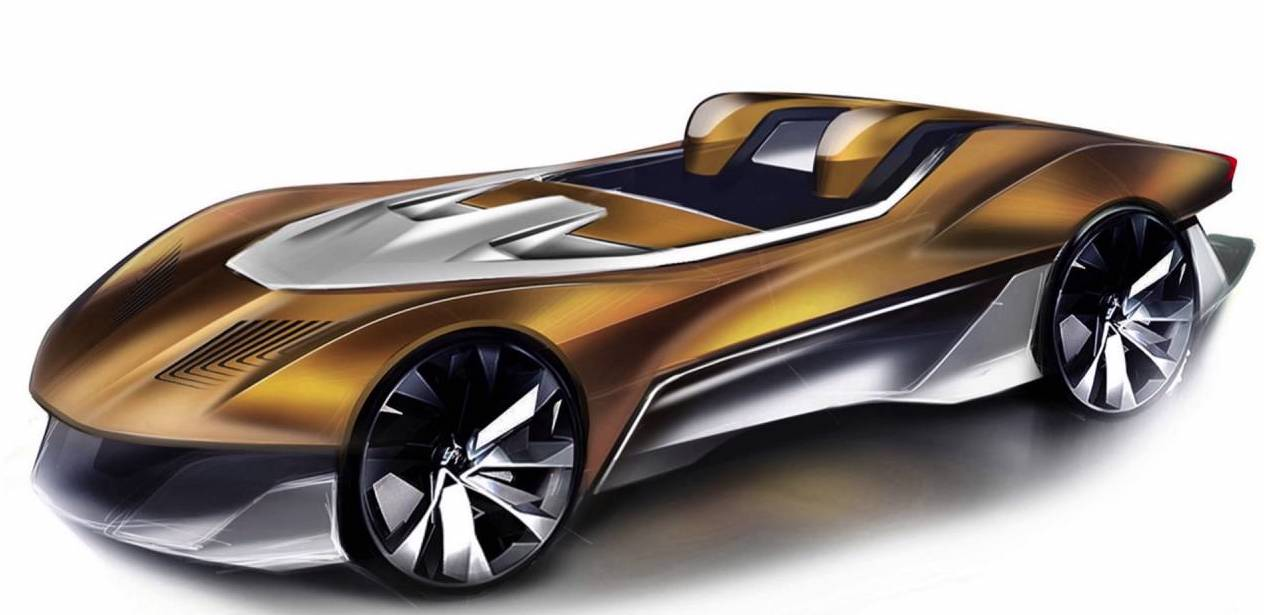

#### What you need to do is to trace the contour of the upper part of the body of the car by using natural cubic spline functions. More precisely, you should calculate a natural cubic spline function $s(x)$ that describe the upper outline of the car, starting from the leftmost point of the yellow part to the rightmost point to the taillight. 

<ol>
    <li>By using some graphic tool such as Microsoft Paint or Photoshop, find the coordinates of several sample points.</li>
    <li>Compute the natural cubic spline function connecting the sample points.</li>
    <li>Plot your spline function.</li>
</ol>
Your graph of the spline function should have no significant error (I know this is somewhat subjective, but...) compare to the outline of the original image. 10 pts for the correctness of the code. The remaining 10 points is for the best performance, in terms of the <em>number of sample points</em>. For example, the team using the smallest number of sample points will get 10 pts, the next team will get 9 pts, etc. Keep in mind that your spline should not have any significant difference with the original image. It is important which sample points you use. Try several examples and get some lesson. 

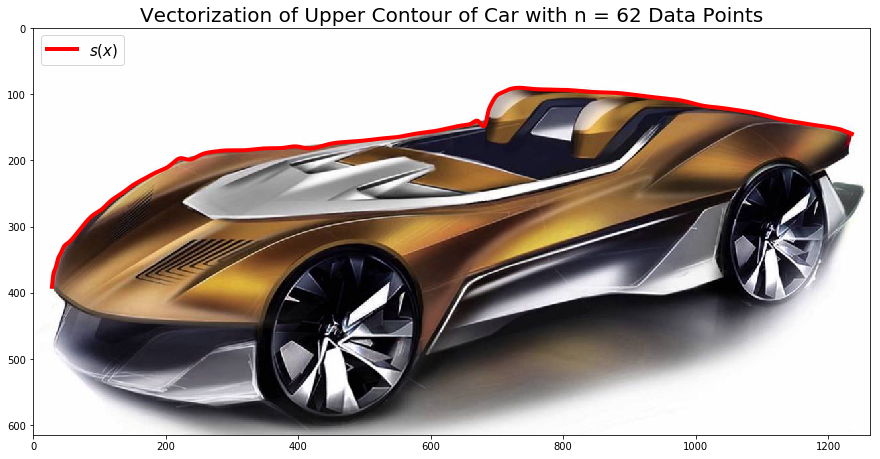

In [132]:
def spline_contour_of_car(x_vec, y_vec):
    spline = cubic_spline(x_vec, y_vec)

    x_plot = np.linspace(min(x_vec), max(x_vec), 10000)

    spline_plot = interpolate_with_spline(x_plot, spline)

    n = len(x_vec)

    im = plt.imread("car.jpg")
    implot = plt.imshow(im)

    #Plot the two functions
    plt.plot(x_plot, spline_plot, 'r-', label = '$s(x)$', linewidth = 4.0)
    plt.legend(loc='upper left', fontsize = 15)
    plt.title("Vectorization of Upper Contour of Car with n = %i Data Points" %n, fontsize = 20)
    plt.show()
    

x_vec = [28.0, 30.0, 33.0, 37.0, 40.0, 45.0, 52.0, 65.0, 77.0, 91.0, 102.0, 117.0, 
         132.0, 145.0, 165.0, 188.0, 206.0, 221.0, 235.0, 252.0, 272.0, 292.0, 315.0, 349.0, 379.0,
        397.0, 414.0, 444.0, 475.0, 501.0, 526.0, 549.0, 576.0, 605.0, 629.0, 650.0, 662.0, 672.0,
        684.0, 687.0, 690.0, 696.0, 700.0, 707.0, 718.0, 752.0, 810.0, 848.0, 878.0, 922.0, 949.0, 989.0,
        1008.0, 1031.0, 1068.0, 1091.0, 1123.0, 1156.0, 1174.0, 1196.0, 1218.0, 1236.0]
y_vec = [391.0, 373.0, 364.0, 349.0, 343.0, 332.0, 325.0, 311.0, 296.0, 282.0, 275.0, 261.0, 251.0, 
         241.0, 229.0, 217.0, 208.0, 197.0, 199.0, 192.0, 187.0, 185.0, 185.0, 182.0, 181.0,
        179.0, 182.0, 176.0, 172.0, 170.0, 167.0, 165.0, 160.0, 156.0, 151.0, 147.0, 144.0, 141.0,
        140.0, 126.0, 118.0, 107.0, 102.0, 98.0, 93.0, 92.0, 94.0, 97.0, 98.0, 103.0, 106.0, 112.0,
        117.0, 120.0, 125.0, 129.0, 137.0, 143.0, 146.0, 149.0, 153.0, 160.0]

spline_contour_of_car(x_vec, y_vec)

Let's try using fewer data points by removing data where $\Delta y$ is small:

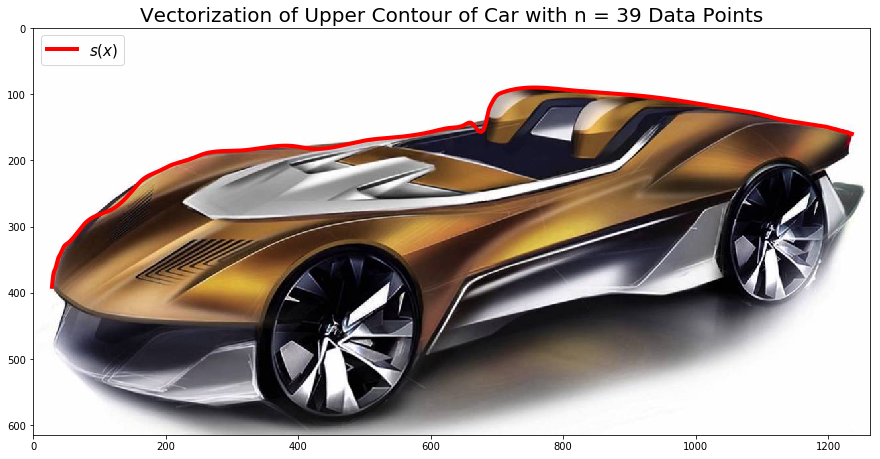

In [129]:
new_x_vec = []
new_y_vec = []

#Code to skip data points based upon slope
#Count = 3 ensures that at most 3 consecutive data points are skipped
count = 3
skipped = True
for i in range(1,len(x_vec)):
    #Make sure first data point is included
    if i == 1:
        new_x_vec.append(x_vec[0])
        new_y_vec.append(y_vec[0])
    #Make sure last data point is included
    elif i == len(x_vec)-1:
        new_x_vec.append(x_vec[i])
        new_y_vec.append(y_vec[i])
    #Select x & y values based on magnitude of slope
    else:
        slope_magnitude = abs(y_vec[i]-y_vec[i-1])/(x_vec[i]-x_vec[i-1])
        
        if slope_magnitude > 0.15:
            new_x_vec.append(x_vec[i-1])
            new_y_vec.append(y_vec[i-1])
            skipped = False
            count = 3
        else:
            skipped = True
            count -= 1

        if count == 0:
            new_x_vec.append(x_vec[i-1])
            new_y_vec.append(y_vec[i-1])
            count = 3

    
        
spline_contour_of_car(new_x_vec, new_y_vec)

We have reduced the number of data points by $\frac{39-62}{62}x100\% \approx -37.097\%$. yet the fit has not been compromised much at all. Let us now try to be even stricter with our criteria for choosing data points:

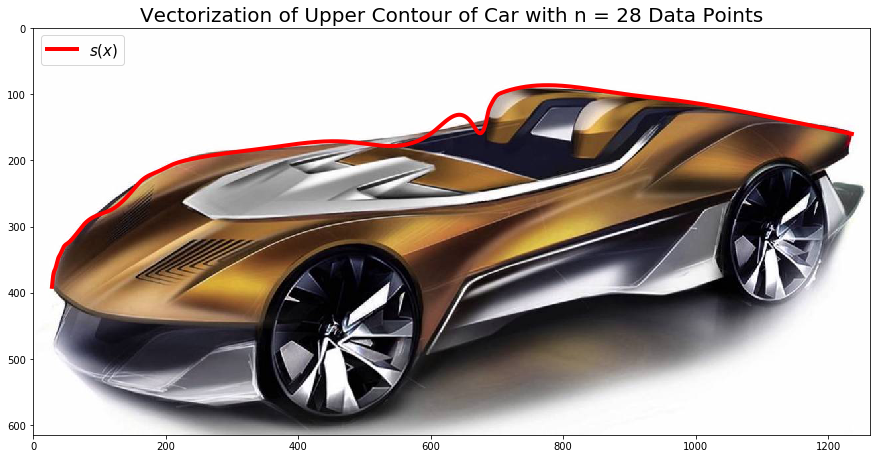

In [128]:
new_x_vec = []
new_y_vec = []

#Code to skip data points based upon slope
#Count = 5 ensures that at most 5 consecutive data points are skipped
count = 5
skipped = True
for i in range(1,len(x_vec)):
    #Make sure first data point is included
    if i == 1:
        new_x_vec.append(x_vec[0])
        new_y_vec.append(y_vec[0])
    #Make sure last data point is included
    elif i == len(x_vec)-1:
        new_x_vec.append(x_vec[i])
        new_y_vec.append(y_vec[i])
    #Select x & y values based on magnitude of slope
    else:
        slope_magnitude = abs(y_vec[i]-y_vec[i-1])/(x_vec[i]-x_vec[i-1])
        
        if slope_magnitude > 0.25:
            new_x_vec.append(x_vec[i-1])
            new_y_vec.append(y_vec[i-1])
            skipped = False
            count = 5
        else:
            skipped = True
            count -= 1

        if count == 0:
            new_x_vec.append(x_vec[i-1])
            new_y_vec.append(y_vec[i-1])
            count = 5

spline_contour_of_car(new_x_vec, new_y_vec)

We now require that $\Delta y > 0.25$ and allow up to 5 consecutive data points to be skipped. This results in a $\frac{28-62}{62}x100\% \approx -54.84\%$ decrease in the data required when compared to the original interpolation and a $\frac{28-39}{39}x100\% \approx -25.64\%$ decrease in the data required when compared to the previous smaller interpolation (with $n = 39$). The fit has started to have some more noticeable errors, but still does a fairly good job of outlining most of the upper contour of the car.

The algorithm based on the $\Delta y$ and skip parameters may be too "naive" of an approach, as it may have trouble determining the most important points to use in our natural cubic spline calculation. As a result, I will now attempt to determine the most important points visually from the image:

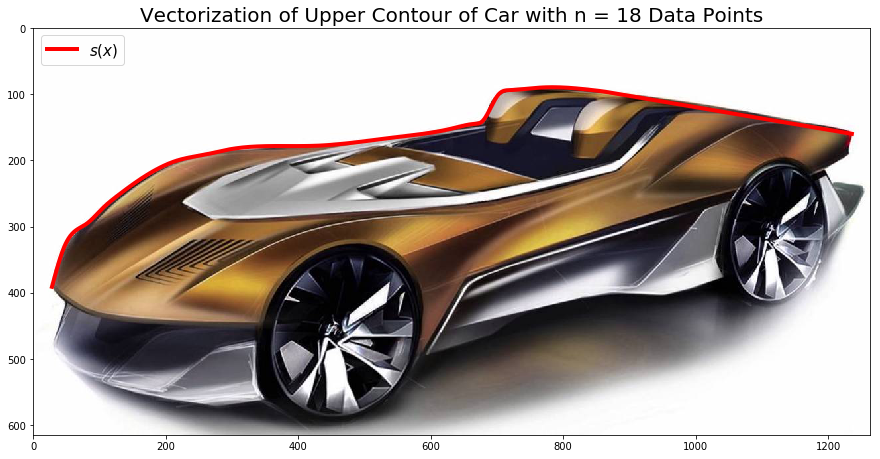

In [157]:
x_vec = [28.0, 46.0, 80.0, 106.0, 125.0, 218.0, 261.0, 293.0, 427.0, 
         548.0, 632.0, 666.0, 678.0, 702.0, 719.0, 768.0, 861.0, 1236.0]
y_vec = [391.0, 332.0, 296.0, 271.0, 255.0, 200.0, 191.0, 184.0, 178.0, 
         165.0, 152.0, 145.0, 141.0, 101.0, 94.0, 90.0, 96.0, 160.0]

spline_contour_of_car(x_vec, y_vec)

This seems to be a great approach, as it has reduced the number of data points from our original interpolation by $\frac{18-62}{62}x100\% \approx -70.97\%$. I will now try to further reduce the number of data points using more visual analysis:

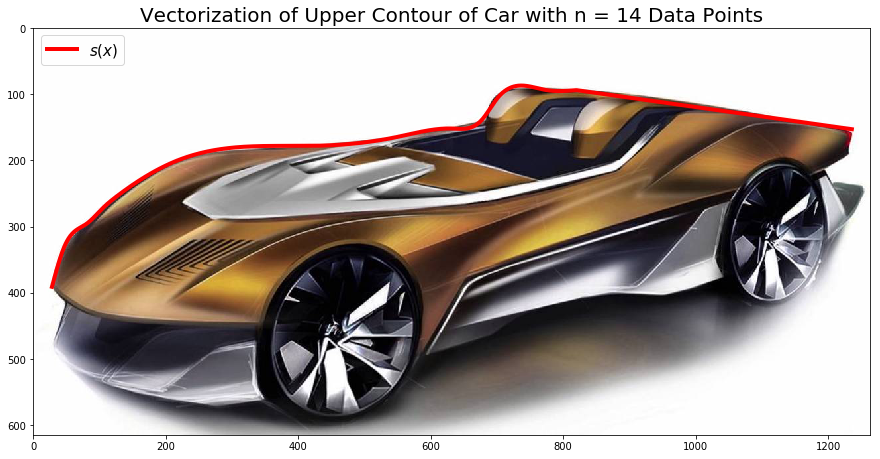

In [192]:
x_vec = [28.0, 46.0, 80.0, 106.0, 125.0, 218.0, 427.0, 
         548.0, 632.0, 678.0, 700.0, 775.0, 820.0, 1236.0]
y_vec = [391.0, 332.0, 296.0, 271.0, 255.0, 200.0, 178.0, 
         165.0, 152.0, 138.0, 107.0, 94.0, 94.0, 153.0]

spline_contour_of_car(x_vec, y_vec)

It appears that 14 data points is the lowest number I could reach through purely visual analysis while still preserving the fit of the spline to the contour of the car. This represents a change of $\frac{14-62}{62}x100\% \approx -77.42\%$ compared to our original model!